## Import Libraries

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Get the data

In [48]:
df = pd.read_csv('../../../datasets/parte2/treino/dataset.csv')

#### Columns

In [49]:
df.columns

Index(['dt', 'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'rain_1h', 'clouds_all', 'weather_description', 'date', 'hour',
       'normal', 'economic_schedule', 'self-consumption', 'injection'],
      dtype='object')

#### Shape

In [50]:
df.shape

(11016, 20)

In [51]:
df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,date,hour,normal,economic_schedule,self-consumption,injection
0,1632873600,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,2021-09-29,0,0.0,0.0,0.0,NaN
1,1632877200,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,2021-09-29,1,0.0,0.0,0.0,NaN
2,1632880800,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,2021-09-29,2,0.0,0.0,0.0,NaN
3,1632884400,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,2021-09-29,3,0.0,0.0,0.0,NaN
4,1632888000,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,2021-09-29,4,0.0,0.0,0.0,NaN


#### Dataset info

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   11016 non-null  int64  
 1   city_name            11016 non-null  object 
 2   temp                 11016 non-null  float64
 3   feels_like           11016 non-null  float64
 4   temp_min             11016 non-null  float64
 5   temp_max             11016 non-null  float64
 6   pressure             11016 non-null  int64  
 7   sea_level            0 non-null      float64
 8   grnd_level           0 non-null      float64
 9   humidity             11016 non-null  int64  
 10  wind_speed           11016 non-null  float64
 11  rain_1h              2284 non-null   float64
 12  clouds_all           11016 non-null  int64  
 13  weather_description  11016 non-null  object 
 14  date                 11016 non-null  object 
 15  hour                 11016 non-null 

#### Unique values

In [53]:
print(df["dt"].unique())
print(len(df["dt"].unique()))

print(df["city_name"].unique())
print(df["weather_description"].unique())
print(df["date"].unique())

#print(df["injection"].unique())

print(df["rain_1h"].unique())
print(len(df["rain_1h"].unique()))

[1632873600 1632877200 1632880800 ... 1672520400 1672524000 1672527600]
11016
['local']
['overcast clouds' 'broken clouds' 'few clouds' 'sky is clear'
 'scattered clouds' 'light rain' 'moderate rain' 'heavy intensity rain']
['2021-09-29' '2021-09-30' '2021-10-01' '2021-10-02' '2021-10-03'
 '2021-10-04' '2021-10-05' '2021-10-06' '2021-10-07' '2021-10-08'
 '2021-10-09' '2021-10-10' '2021-10-11' '2021-10-12' '2021-10-13'
 '2021-10-14' '2021-10-15' '2021-10-16' '2021-10-17' '2021-10-18'
 '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22' '2021-10-23'
 '2021-10-24' '2021-10-25' '2021-10-26' '2021-10-27' '2021-10-28'
 '2021-10-29' '2021-10-30' '2021-10-31' '2021-11-01' '2021-11-02'
 '2021-11-03' '2021-11-04' '2021-11-05' '2021-11-06' '2021-11-07'
 '2021-11-08' '2021-11-09' '2021-11-10' '2021-11-11' '2021-11-12'
 '2021-11-13' '2021-11-14' '2021-11-15' '2021-11-16' '2021-11-17'
 '2021-11-18' '2021-11-19' '2021-11-20' '2021-11-21' '2021-11-22'
 '2021-11-23' '2021-11-24' '2021-11-25' '2021-11-2

#### Statistical dispersion

In [54]:
print(df.describe())


                 dt          temp    feels_like      temp_min      temp_max  \
count  1.101600e+04  11016.000000  11016.000000  11016.000000  11016.000000   
mean   1.652701e+09     16.182991     15.826868     14.195064     17.288098   
std    1.144868e+07      5.756972      6.264860      4.956014      6.164689   
min    1.632874e+09      0.320000     -2.190000     -0.640000      1.330000   
25%    1.642787e+09     12.080000     11.507500     10.720000     12.890000   
50%    1.652701e+09     15.625000     15.230000     14.230000     16.260000   
75%    1.662614e+09     19.270000     19.260000     17.490000     20.340000   
max    1.672528e+09     40.850000     41.330000     36.720000     41.450000   

           pressure  sea_level  grnd_level      humidity    wind_speed  \
count  11016.000000        0.0         0.0  11016.000000  11016.000000   
mean    1018.396605        NaN         NaN     76.570715      2.672039   
std        6.203379        NaN         NaN     16.268260      1.47

#### Missing values

In [55]:
print(df.isna().sum())

dt                         0
city_name                  0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              11016
grnd_level             11016
humidity                   0
wind_speed                 0
rain_1h                 8732
clouds_all                 0
weather_description        0
date                       0
hour                       0
normal                     0
economic_schedule          0
self-consumption           0
injection               7777
dtype: int64


#### Filling missing value with 'None' in 'injection' column

In [56]:
df['injection'] = df['injection'].fillna("None")

In [57]:
print(df["injection"].unique())

['None' 'Low' 'Medium' 'High' 'Very High']


In [58]:
print(df.isna().sum())

dt                         0
city_name                  0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              11016
grnd_level             11016
humidity                   0
wind_speed                 0
rain_1h                 8732
clouds_all                 0
weather_description        0
date                       0
hour                       0
normal                     0
economic_schedule          0
self-consumption           0
injection                  0
dtype: int64


## Univariate Analysis

#### dt variable

In [59]:
df['dt'].value_counts()

dt
1632873600    1
1659322800    1
1659294000    1
1659297600    1
1659301200    1
             ..
1646096400    1
1646100000    1
1646103600    1
1646107200    1
1672527600    1
Name: count, Length: 11016, dtype: int64

## Multivariate Analysis

#### Relation between all variables

In [60]:
#sns.pairplot(df, hue='injection ')

#### Features mean by class

In [61]:
#df.groupby(by=['injection']).mean(numeric_only=True)

#### Outliers

c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: ylabel='self-consumption'>

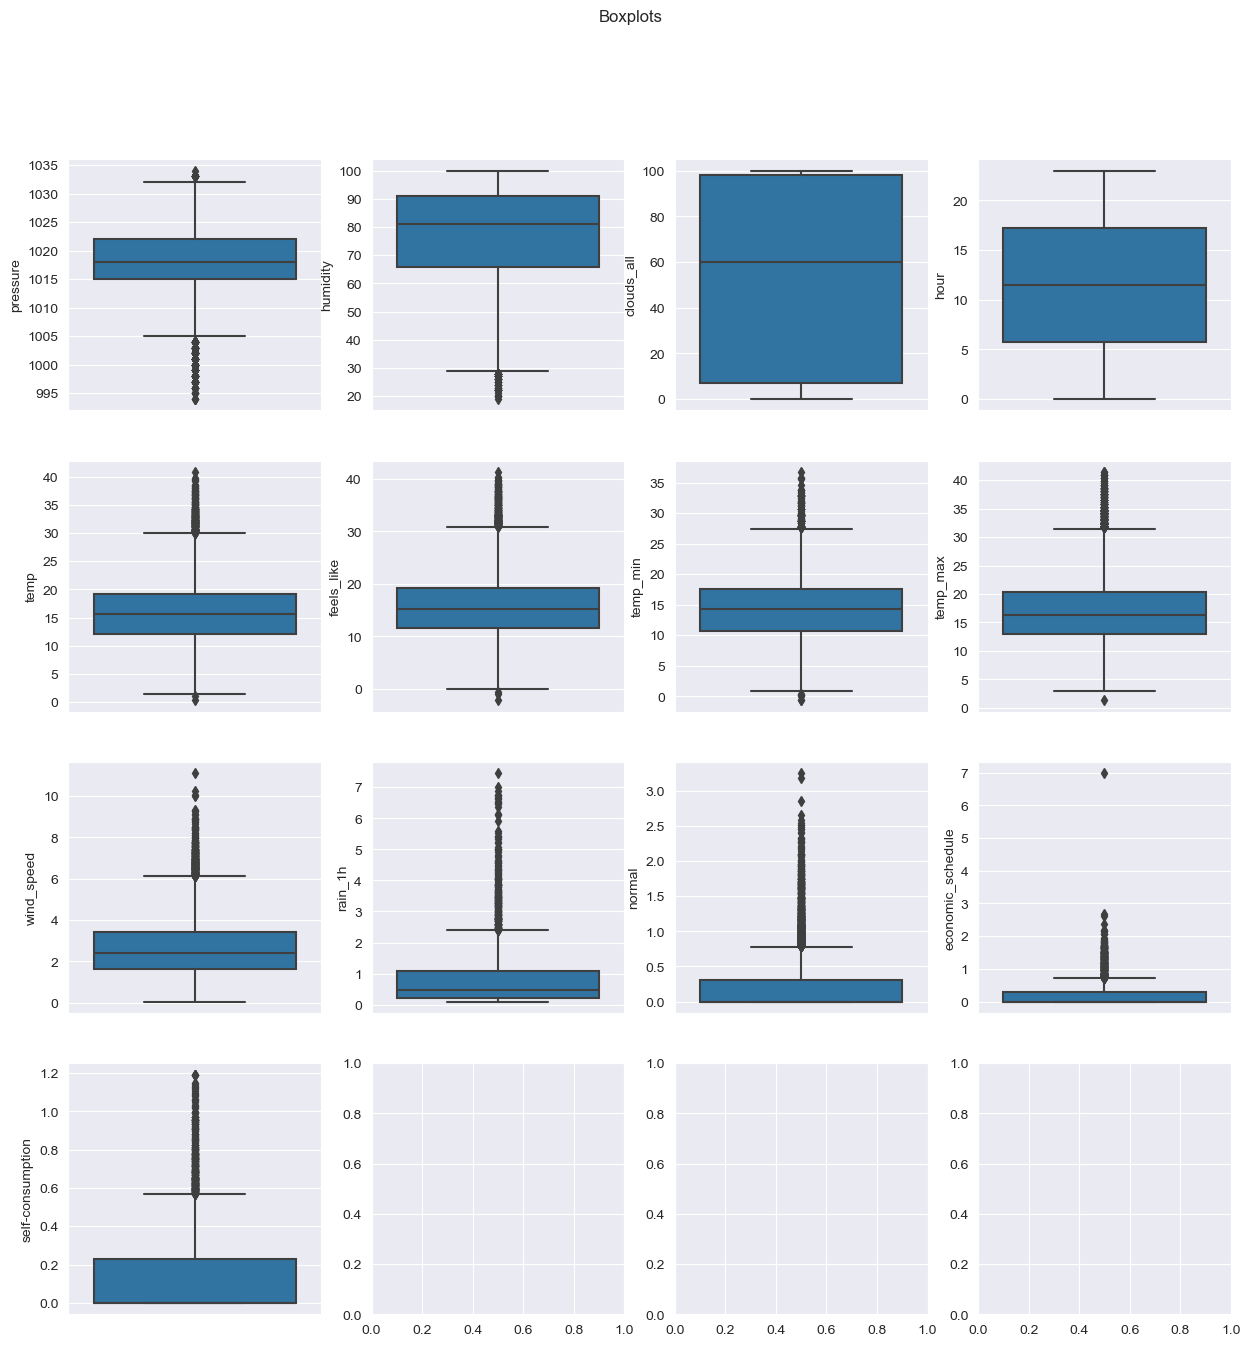

In [62]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Boxplots")

sns.boxplot(y=df["pressure"], ax=axs[0,0])
sns.boxplot(y=df["humidity"], ax=axs[0,1])
sns.boxplot(y=df["clouds_all"], ax=axs[0,2])
sns.boxplot(y=df["hour"], ax=axs[0,3])
sns.boxplot(y=df["temp"], ax=axs[1,0])
sns.boxplot(y=df["feels_like"], ax=axs[1,1])
sns.boxplot(y=df["temp_min"], ax=axs[1,2])
sns.boxplot(y=df["temp_max"], ax=axs[1,3])
sns.boxplot(y=df["wind_speed"], ax=axs[2,0])
sns.boxplot(y=df["rain_1h"], ax=axs[2,1])
sns.boxplot(y=df["normal"], ax=axs[2,2])
sns.boxplot(y=df["economic_schedule"], ax=axs[2,3])
sns.boxplot(y=df["self-consumption"], ax=axs[3,0])

#### Statistical dispersion

c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Axes: xlabel='self-consumption', ylabel='Count'>

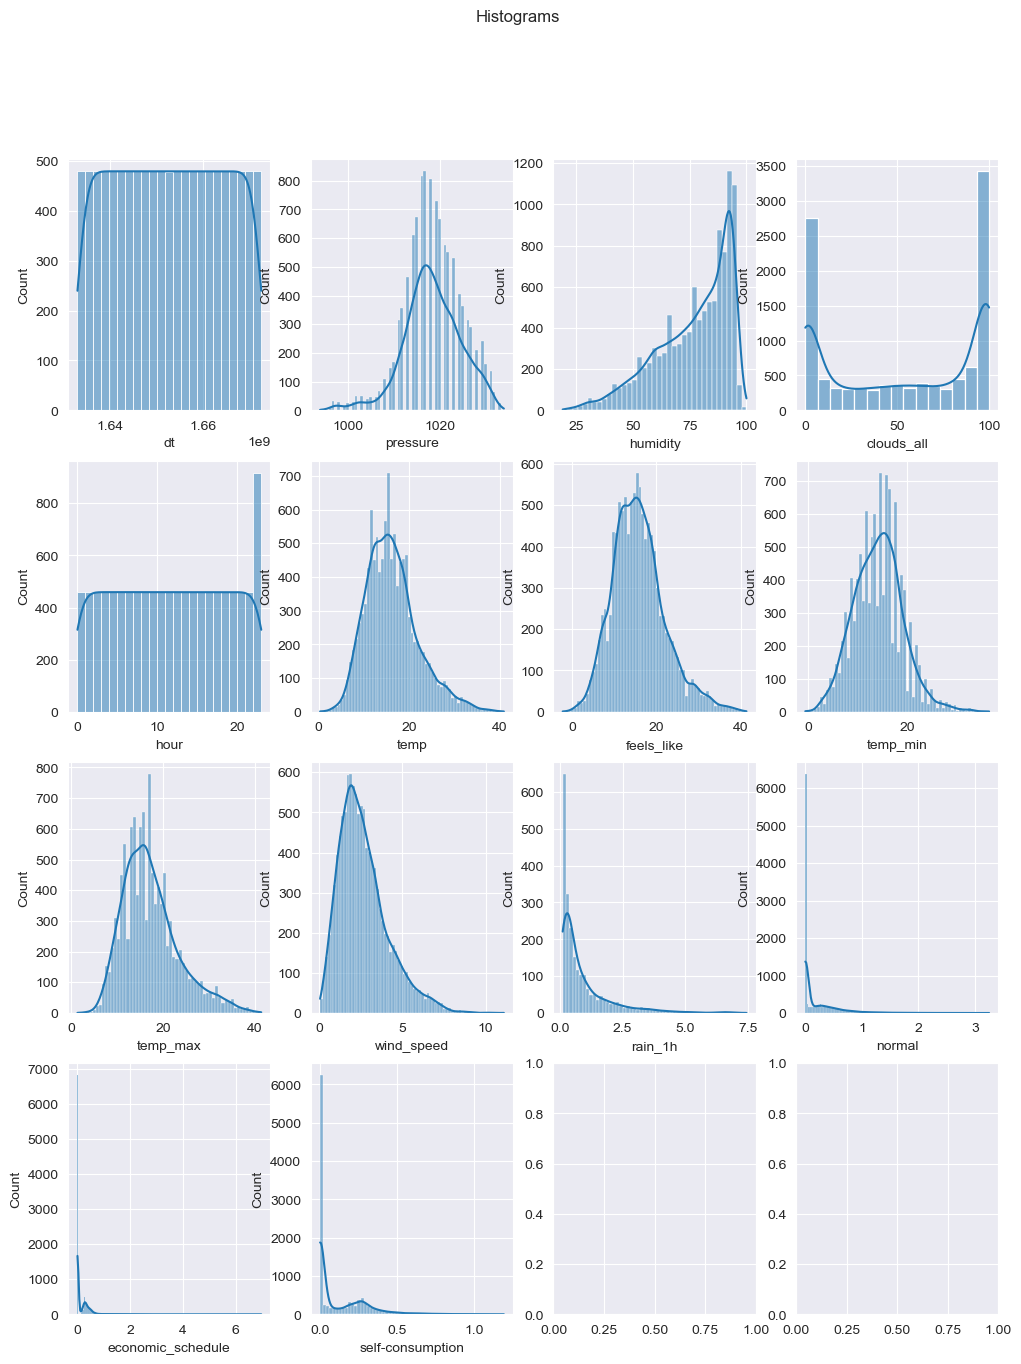

In [63]:
fig, axs = plt.subplots(4, 4, figsize=(12, 15))
fig.suptitle("Histograms")

sns.histplot(df["dt"], ax=axs[0,0], kde=True)
sns.histplot(df["pressure"], ax=axs[0,1], kde=True)
sns.histplot(df["humidity"], ax=axs[0,2], kde=True)
sns.histplot(df["clouds_all"], ax=axs[0,3], kde=True)
sns.histplot(df["hour"], ax=axs[1,0], kde=True)
sns.histplot(df["temp"], ax=axs[1,1], kde=True)
sns.histplot(df["feels_like"], ax=axs[1,2], kde=True)
sns.histplot(df["temp_min"], ax=axs[1,3], kde=True)
sns.histplot(df["temp_max"], ax=axs[2,0], kde=True)
sns.histplot(df["wind_speed"], ax=axs[2,1], kde=True)
sns.histplot(df["rain_1h"], ax=axs[2,2], kde=True)
sns.histplot(df["normal"], ax=axs[2,3], kde=True)
sns.histplot(df["economic_schedule"], ax=axs[3,0], kde=True)
sns.histplot(df["self-consumption"], ax=axs[3,1], kde=True)

c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


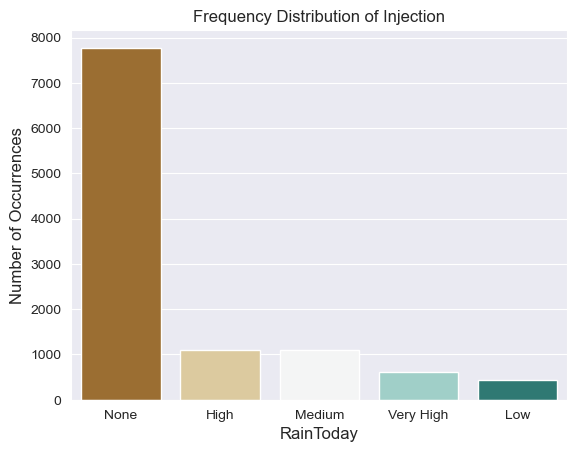

In [64]:
injection_count = df['injection'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=injection_count.index, y=injection_count.values, palette='BrBG')
plt.title('Frequency Distribution of Injection')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainToday', fontsize=12)
plt.show()

In [65]:
label_encoder = LabelEncoder()

df['injection'] = label_encoder.fit_transform(df['injection'])

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)

c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

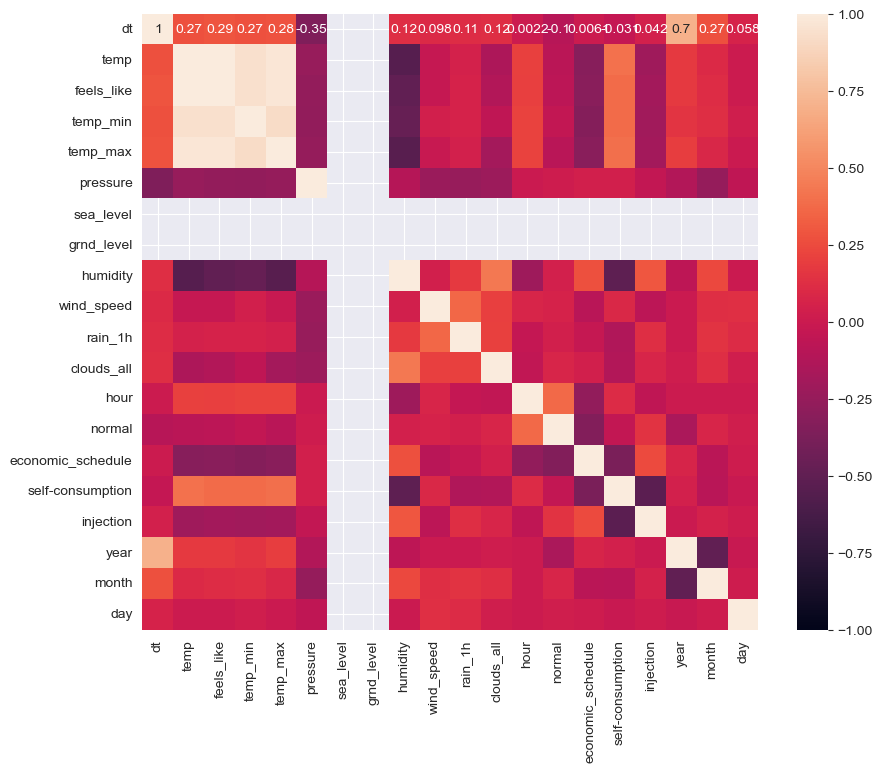

In [66]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [67]:
print(corr_matrix["injection"])

dt                   0.041863
temp                -0.209680
feels_like          -0.195312
temp_min            -0.199771
temp_max            -0.193484
pressure            -0.040450
sea_level                 NaN
grnd_level                NaN
humidity             0.292897
wind_speed          -0.070369
rain_1h              0.124366
clouds_all           0.077215
hour                -0.057440
normal               0.147976
economic_schedule    0.242812
self-consumption    -0.527046
injection            1.000000
year                -0.000522
month                0.050900
day                  0.010767
Name: injection, dtype: float64
